**PROJECT 4:**
**Wrangle and Analyze Data**

In this project I will analyze 3 data sets with information gathered from Twitter.

First, I import libraries

In [44]:
import pandas as pd
import numpy as np

**1. Gathering Data**

**1.1. The WeRateDogs Twitter archive**

Now I import datasets:

In [45]:
df1=pd.read_csv('twitter-archive-enhanced.csv')

**1.2. The tweet image predictions**

In [46]:
import requests
import os
from io import StringIO

url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
image_predictions=requests.get(url)
df2=pd.read_csv(StringIO(image_predictions.text),sep='\t')
#print(df2)

**1.3. Each tweet's retweet count and favorite ("like") count**

In [47]:
import tweepy
import json

data=[]
with open ("tweet-json.txt") as file2:
    for line in file2:
        data.append(json.loads(line))
df3=pd.DataFrame(data)
#print(df3)

**1.4. Merging data**

- I will first analyze and compare which is the common information in the three data frame
- search for duplicates
- search for missing values
- df shape
- define what are the requirement: which is the question

By checking dimensions of dataframes and preview of first rows, I observed:
- not the same name of columns
- not the same dimensions of the columns

Interesting columns: 
- df1: tweet_id, time and date, dog name, 
- df2: tweet_id, image url, "breed" prediction,
- df3: número de RT y likes, ID, text length (full text),language. 

After wrangling I will merge the dataframes


**2. Assessing Data**

The data assessment is presented. 8 quality issues are detected and fixed and 2 tidiness issues are also fixed.

The tidiness issues detected are:
- date and time, new column
- delete columns that arent needed

The quality issues detected are:

- date format has +0000 which is hard to deal with
- new columns are needed for year, month, day of the week, day, hour
- the name of the dogs breed is with capital letters and some others without
- the number of rows is not the same for all DF
- The column "display_text_range" shows the number of characters but not in numeric format
- The tweet ID column has different name in the DFs
- df3 has id column repeated
- columns entities, extended_entities have characters that are not readable, symbols and emoticons


In [48]:
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [49]:
df1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [50]:
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [51]:
df2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [52]:
df3.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,False,False,en,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,False,False,en,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,False,False,en,NaN,NaN,NaN,NaN


In [53]:
df3.describe()

,id,in_reply_to_status_id,in_reply_to_user_id,retweet_count,favorite_count,quoted_status_id
count,2.354000e+03,7.800000e+01,7.800000e+01,2354.000000,2354.000000,2.900000e+01
mean,7.426978e+17,7.455079e+17,2.014171e+16,3164.797366,8080.968564,8.162686e+17
std,6.852812e+16,7.582492e+16,1.252797e+17,5284.770364,11814.771334,6.164161e+16
min,6.660209e+17,6.658147e+17,1.185634e+07,0.000000,0.000000,6.721083e+17
25%,6.783975e+17,6.757419e+17,3.086374e+08,624.500000,1415.000000,7.888183e+17
50%,7.194596e+17,7.038708e+17,4.196984e+09,1473.500000,3603.500000,8.340867e+17
75%,7.993058e+17,8.257804e+17,4.196984e+09,3652.000000,10122.250000,8.664587e+17
max,8.924206e+17,8.862664e+17,8.405479e+17,79515.000000,132810.000000,8.860534e+17


**Shape assessment**

In [54]:
df1.shape

(2356, 17)

In [55]:
df2.shape

(2075, 12)

In [56]:
df3.shape

(2354, 31)

**Finding duplicates**

In [57]:
df1.duplicated().describe()


count      2356
unique        1
top       False
freq       2356
dtype: object

In [58]:
df2.duplicated().describe()


count      2075
unique        1
top       False
freq       2075
dtype: object

Since there are no duplicates and the row number is different, it means there are more tweets in some df. The extra tweets should be deleted

**Create copy of the data sets**

In [59]:
df1_copy=df1.copy(deep=True)
df2_copy=df2.copy(deep=True)
df3_copy=df3.copy(deep=True)

**3. Cleaning Data**

In this section I will be cleaning the quality issues and tidiness.

**3.1. Date format** **(1st quality issue fix)**

**Define:** Changing columns with date information to date-format. I decided to delete manually the "+0000" and then change the format to '%Y-%m-%d %H:%M:%S '

In [60]:
#print to see first 10 rows how they are presented
for i in range(0,10):
    print(df1["timestamp"][i])

2017-08-01 16:23:56 +0000
2017-08-01 00:17:27 +0000
2017-07-31 00:18:03 +0000
2017-07-30 15:58:51 +0000
2017-07-29 16:00:24 +0000
2017-07-29 00:08:17 +0000
2017-07-28 16:27:12 +0000
2017-07-28 00:22:40 +0000
2017-07-27 16:25:51 +0000
2017-07-26 15:59:51 +0000


**Code**

In [61]:
#delete "+0000"
for i in range(0,2356):
    df1["timestamp"][i]=df1["timestamp"][i].replace("+0000","")

print(df1["timestamp"][0:10])

C:\Users\natal\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0    2017-08-01 16:23:56 
1    2017-08-01 00:17:27 
2    2017-07-31 00:18:03 
3    2017-07-30 15:58:51 
4    2017-07-29 16:00:24 
5    2017-07-29 00:08:17 
6    2017-07-28 16:27:12 
7    2017-07-28 00:22:40 
8    2017-07-27 16:25:51 
9    2017-07-26 15:59:51 
Name: timestamp, dtype: object


In [62]:
#change to date format
import datetime 
for i in range(0,2356):
    df1["timestamp"][i] = datetime.datetime.strptime(df1["timestamp"][i], '%Y-%m-%d %H:%M:%S ')

C:\Users\natal\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


**Test**

In [63]:
type(df1["timestamp"][1])

datetime.datetime

**3.2. Create new columns for time and date data** **(2d quality issue fix)**

**Define:** add new columns for the variables year, month, day of the week, hour, day number. First I create the columns and then I change the content.

**Code**

In [64]:
#add new columns for the variables year, month, day of the week, hour, day number. 
#First I create the columns and then I change the content
df1['year']=df1['timestamp']
df1['month']=df1['timestamp']
df1['day_of_week']=df1['timestamp']
df1['hour']=df1['timestamp']
df1['day_of_week']=df1['timestamp']
df1['day']=df1['timestamp']

#change columns
df1['year'] = df1['timestamp'].dt.year
df1['month'] = df1['timestamp'].dt.month
df1['day_of_week'] = df1['timestamp'].dt.weekday_name
df1['hour'] = df1['timestamp'].dt.hour
df1['day'] = df1['timestamp'].dt.day
del df1['timestamp'] #first tidiness issue fixed

**Test**

In [65]:
df1.head(2) #I check they are printed correctly

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,...,name,doggo,floofer,pupper,puppo,year,month,day_of_week,hour,day
0,892420643555336193,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,...,Phineas,None,None,None,None,2017,8,Tuesday,16,1
1,892177421306343426,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,...,Tilly,None,None,None,None,2017,8,Tuesday,0,1


**3.3. Uncapitalized letters of dog breed column (3rd quality issue fix)**

**Define:** The name of the dogs breed is with capital letters and some other without.I change that so all are in lowercase.

**Code**

In [66]:
#uncapitalized letters
df2["p1"]=df2["p1"].str.lower()
df2["p2"]=df2["p2"].str.lower()
df2["p3"]=df2["p3"].str.lower()


**Test**

In [67]:
print(df2["p3"]) #check

0                 shetland_sheepdog
1               rhodesian_ridgeback
2                        bloodhound
3                miniature_pinscher
4                          doberman
                   ...             
2070    german_short-haired_pointer
2071                        spatula
2072                         kelpie
2073                       papillon
2074                         banana
Name: p3, Length: 2075, dtype: object


**3.4. Tweet ID column (4th quality issue fix)**

**Define** The tweet ID column has different names in the 3 datasets. I change it so it has the same column name in all dataframes for tweet ID column.

In [68]:
df3.head(2)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,False,False,en,NaN,NaN,NaN,NaN


**Code**

In [69]:
#rename column
df3=df3.rename(columns={"id": "tweet_id"})

**Test**

In [70]:
df3.head(2)

,created_at,tweet_id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,False,False,en,NaN,NaN,NaN,NaN


**3.5. Text length (5th quality issue fix)**

**Define** Text length in format [  ,  ] is not easy to deal with and it is easier to work with a number.I change it to one that has only a numeric value. First I create a column and then modify it so it shows only the number. I create a new column that shows the lenght of the text.

First I checked that column display_text_range was the number of characters of df3['full_text'].

**Code**

In [71]:
#create new column that shows the lenght of the text
#first, create the column
df3['text_length']=df3['display_text_range']

#leave only the number
for i in range(0,2354):
    df3['text_length'][i]=df3['display_text_range'][i][1]


C:\Users\natal\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


**Test**

In [72]:
df3.head(2) #check if the change was done properly

,created_at,tweet_id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status,text_length
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,85
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,138


**3.6. Delete repeated column (6th quality issue fix)**

**Define:** df3 has the "tweet id" column repeated. One of them is called "id" and the other "id_str".

**Code**

In [73]:
del df3['id_str']

**Test**

In [74]:
df3.head(2)

,created_at,tweet_id,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status,text_length
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,False,False,False,False,en,NaN,NaN,NaN,NaN,85
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,False,False,False,False,en,NaN,NaN,NaN,NaN,138


**3.7. Row/observation number (7th quality issue)**

The 3 dataframes do not have the same number of observations. This means some of the observations are only present in one or two dataframes but not in the 3 of them, and that means I do not have all the information for those tweets. I delete the ones that are not present in all of the dataframes. I do it by merging the three df "inner" way.

In [75]:
df1.shape

(2356, 21)

In [76]:
df2.shape

(2075, 12)

In [77]:
df3.shape

(2354, 31)

**Define** I merge the three datasets into one name df6 and I use in the argument "inner" to delete the extra rows.

**Code**

In [78]:
df6=df1.merge(df2,how='inner').merge(df3,how='inner')

**Test**

In [79]:
df6.shape

(2073, 59)

**3.8. Check which columns are not needed and delete them (eighth quality issue fix)**

**Define** There are many columns I will not use and I will delete them. First, I will read all the names (for this I will print it) and then chose and delete.

In [80]:
#first I print all the columns 
for col in df6.columns: 
    print(col) 

tweet_id
in_reply_to_status_id
in_reply_to_user_id
source
text
retweeted_status_id
retweeted_status_user_id
retweeted_status_timestamp
expanded_urls
rating_numerator
rating_denominator
name
doggo
floofer
pupper
puppo
year
month
day_of_week
hour
day
jpg_url
img_num
p1
p1_conf
p1_dog
p2
p2_conf
p2_dog
p3
p3_conf
p3_dog
created_at
full_text
truncated
display_text_range
entities
extended_entities
in_reply_to_status_id_str
in_reply_to_user_id_str
in_reply_to_screen_name
user
geo
coordinates
place
contributors
is_quote_status
retweet_count
favorite_count
favorited
retweeted
possibly_sensitive
possibly_sensitive_appealable
lang
retweeted_status
quoted_status_id
quoted_status_id_str
quoted_status
text_length


There is a big amount of information, however, is difficult to deal with so many columns and for purposes of this project I will delete the following columns:


in_reply_to_status_id
in_reply_to_user_id
source
retweeted_status_id
retweeted_status_user_id
retweeted_status_timestamp
expanded_urls
rating_numerator
rating_denominator
jpg_url
img_num
created_at
truncated
display_text_range
entities
extended_entities
in_reply_to_status_id_str
in_reply_to_user_id_str
in_reply_to_screen_name
user
geo
coordinates
place
contributors
is_quote_status
possibly_sensitive
possibly_sensitive_appealable
quoted_status_id
quoted_status_id_str
quoted_status

**Code**

In [81]:
del df6['in_reply_to_status_id']
del df6['in_reply_to_user_id']
del df6['source']
del df6['retweeted_status_id']
del df6['retweeted_status_user_id']
del df6['retweeted_status_timestamp']
del df6['expanded_urls']
del df6['rating_numerator']
del df6['rating_denominator']
del df6['jpg_url']
del df6['img_num']
del df6['created_at']
del df6['truncated']
del df6['display_text_range']
del df6['entities']
del df6['extended_entities']
del df6['in_reply_to_status_id_str']
del df6['in_reply_to_user_id_str']
del df6['in_reply_to_screen_name']
del df6['user']
del df6['geo']
del df6['coordinates']
del df6['contributors']
del df6['is_quote_status']
del df6['possibly_sensitive']
del df6['possibly_sensitive_appealable']
del df6['quoted_status_id']
del df6['quoted_status_id_str']
del df6['quoted_status']

**Test**

In [82]:
#Check
for col in df6.columns: 
    print(col) 

tweet_id
text
name
doggo
floofer
pupper
puppo
year
month
day_of_week
hour
day
p1
p1_conf
p1_dog
p2
p2_conf
p2_dog
p3
p3_conf
p3_dog
full_text
place
retweet_count
favorite_count
favorited
retweeted
lang
retweeted_status
text_length


**4. Storing, Analyzing, and Visualizing Data**

**export csv file**

In [83]:
import csv
df6.to_csv(r'..\twitter_archive_master.csv')

**Analyzes and visualization**

In [84]:
group_by_day=df6.groupby(['day_of_week'])


In [85]:
group_by_day.size() #.max()

day_of_week
Friday       295
Monday       339
Saturday     262
Sunday       262
Thursday     291
Tuesday      311
Wednesday    313
dtype: int64

The day with more twitter activity is Monday

In [86]:
group_by_hour=df6.groupby(['hour'])
print(group_by_hour.size())

hour
0     263
1     294
2     223
3     178
4      96
5      26
6       3
13      2
14      8
15     92
16    196
17    164
18    104
19     86
20     81
21     76
22     70
23    111
dtype: int64


1 am is when more tweets are written

**Visualization**

In [87]:
names=df1["name"]

names=names.tolist()
type(names)

list

In [88]:

for i in range(1,10):        
    for name in names:
        if name == "None":
            names.remove(name)
        if name == "a":
            names.remove(name)


In [89]:
import collections

word_counter = collections.Counter(names)

print("The 10 most common dog names reported in Twitter are:")

for word, count in word_counter.most_common(10):
    print(word, ": ", count)

The 10 most common dog names reported in Twitter are:
Charlie :  12
Oliver :  11
Cooper :  11
Lucy :  11
Lola :  10
Penny :  10
Tucker :  10
Winston :  9
Bo :  9
Sadie :  8


In [90]:
#print(word_counter)

AxesSubplot(0.125,0.125;0.775x0.755)


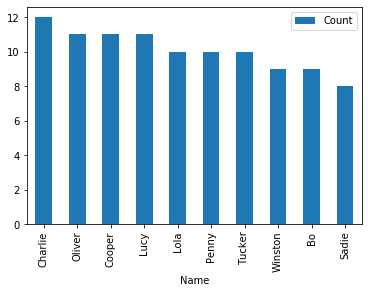

In [93]:
import matplotlib.pyplot as plt

lst = word_counter.most_common(10)
df = pd.DataFrame(lst, columns = ['Name', 'Count'])

print(df.plot.bar(x='Name',y='Count'))

AxesSubplot(0.125,0.125;0.775x0.755)


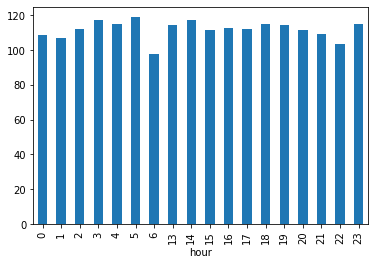

In [92]:
df9=pd.to_numeric(df6['text_length']).groupby(df6['hour']).mean()
print(df9.plot.bar(x='hour',y='text_length'))


the longests tweets are written at 5am and the shortest at 6am